In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline



In [10]:
import yfinance as yf
import datetime as dt

start = dt.datetime(2000,1,1)
end = dt.datetime(2024,11,1)
stock = 'POWERGRID.NS'

df = yf.download(stock, start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385586,35.250713,26.768006,28.908804,855215656
2007-10-08,30.727667,33.480119,30.534512,33.480119,126671715
2007-10-09,32.820168,33.109898,29.085847,30.743756,116725709
2007-10-10,33.126003,33.802045,32.836272,33.673274,67931378
2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


In [12]:
df = df.reset_index()
print(df.columns)
print(df.head())


MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])
Price        Date        Close         High          Low         Open  \
Ticker            POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS   
0      2007-10-05    32.385586    35.250713    26.768006    28.908804   
1      2007-10-08    30.727667    33.480119    30.534512    33.480119   
2      2007-10-09    32.820168    33.109898    29.085847    30.743756   
3      2007-10-10    33.126003    33.802045    32.836272    33.673274   
4      2007-10-11    36.828129    38.630905    32.836270    38.630905   

Price        Volume  
Ticker POWERGRID.NS  
0         855215656  
1         126671715  
2         116725709  
3          67931378  
4         106320954  


In [13]:
data01 = df.to_csv("powergrid.csv")

In [14]:
data01 = pd.read_csv("powergrid.csv")

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data = [go.Candlestick( x= data01['Date'], open = data01['Open'], high = data01['High'], low = data01['Low'], close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False, title = 'Power Grid Corporation of India Ltd. (POWERGRID.NS)')
fig.show()

In [16]:
df = df.drop(['Date'], axis=1)
df.columns

C:\Users\Ravish Bhatnagar\AppData\Local\Temp\ipykernel_16684\325711538.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



MultiIndex([( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [17]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385586,35.250713,26.768006,28.908804,855215656
1,30.727667,33.480119,30.534512,33.480119,126671715
2,32.820168,33.109898,29.085847,30.743756,116725709
3,33.126003,33.802045,32.836272,33.673274,67931378
4,36.828129,38.630905,32.836270,38.630905,106320954


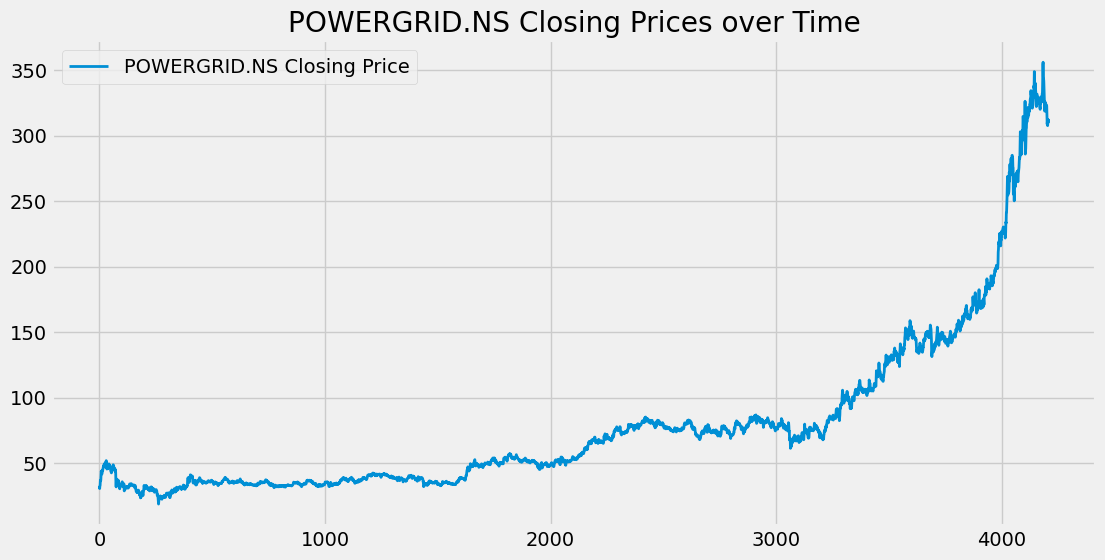

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label = f'{stock} Closing Price',linewidth = 2)
plt.title(f'{stock} Closing Prices over Time')
plt.legend()
plt.show()

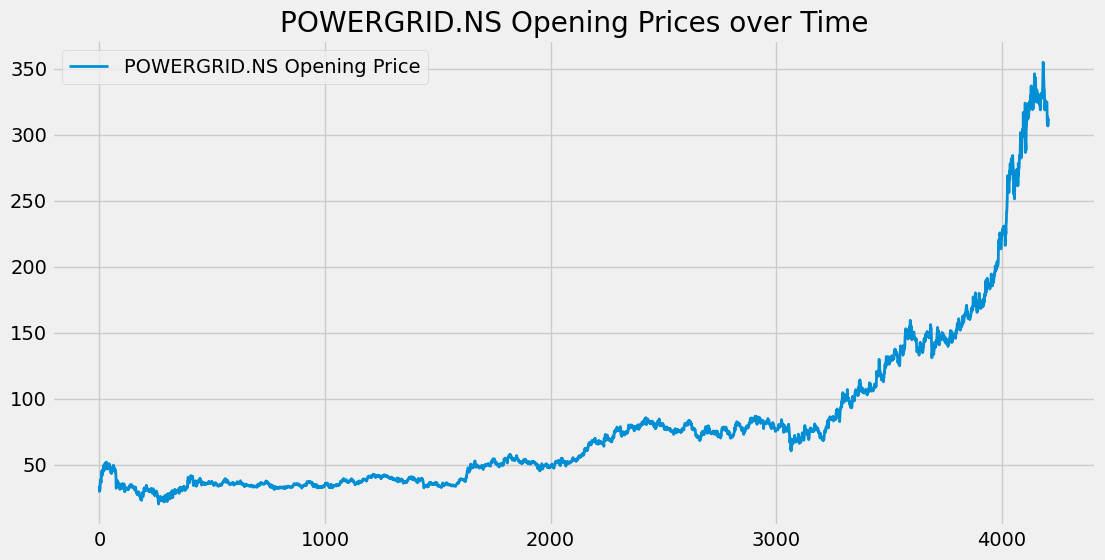

In [19]:

plt.figure(figsize=(12,6))
plt.plot(df['Open'],label = f'{stock} Opening Price',linewidth = 2)
plt.title(f'{stock} Opening Prices over Time')
plt.legend()
plt.show()

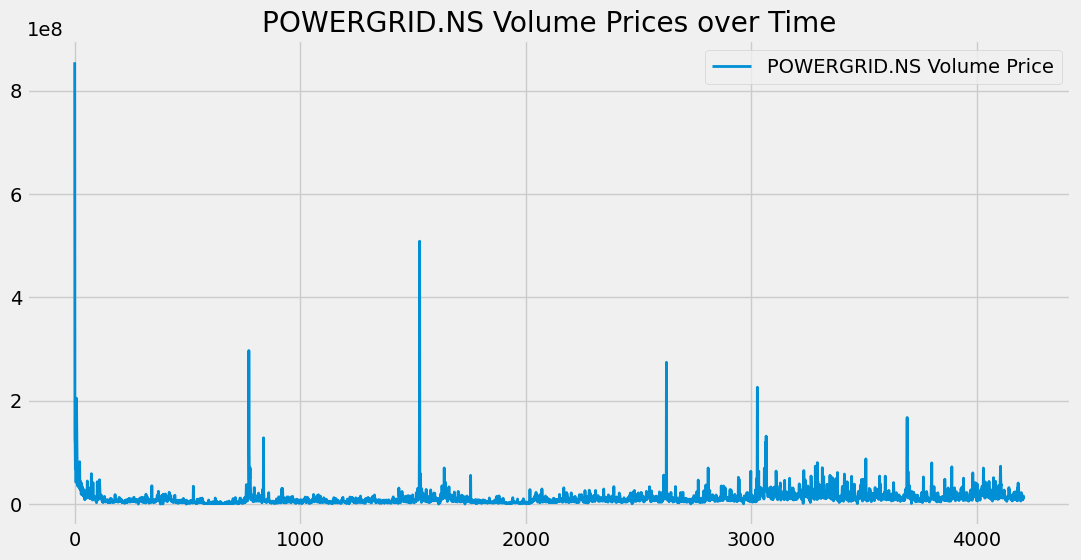

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'],label = f'{stock} Volume Price',linewidth = 2)
plt.title(f'{stock} Volume Prices over Time')
plt.legend()
plt.show()

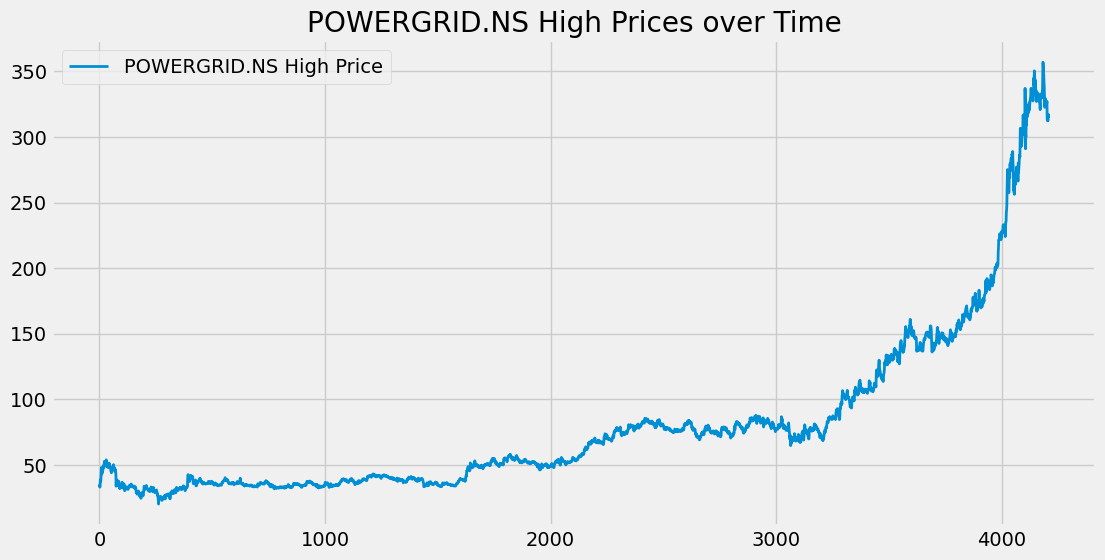

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['High'],label = f'{stock} High Price',linewidth = 2)
plt.title(f'{stock} High Prices over Time')
plt.legend()
plt.show()

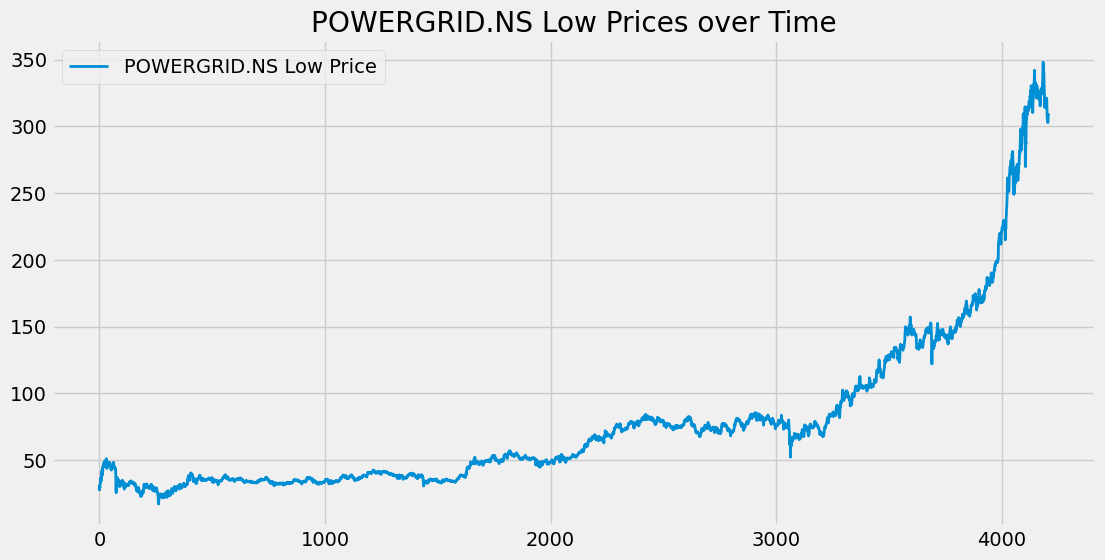

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'],label = f'{stock} Low Price',linewidth = 2)
plt.title(f'{stock} Low Prices over Time')
plt.legend()
plt.show()

In [23]:
# moving average
ma100 = df.Close.rolling(100).mean()

In [24]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670629


In [25]:
ma200 = df.Close.rolling(200).mean()

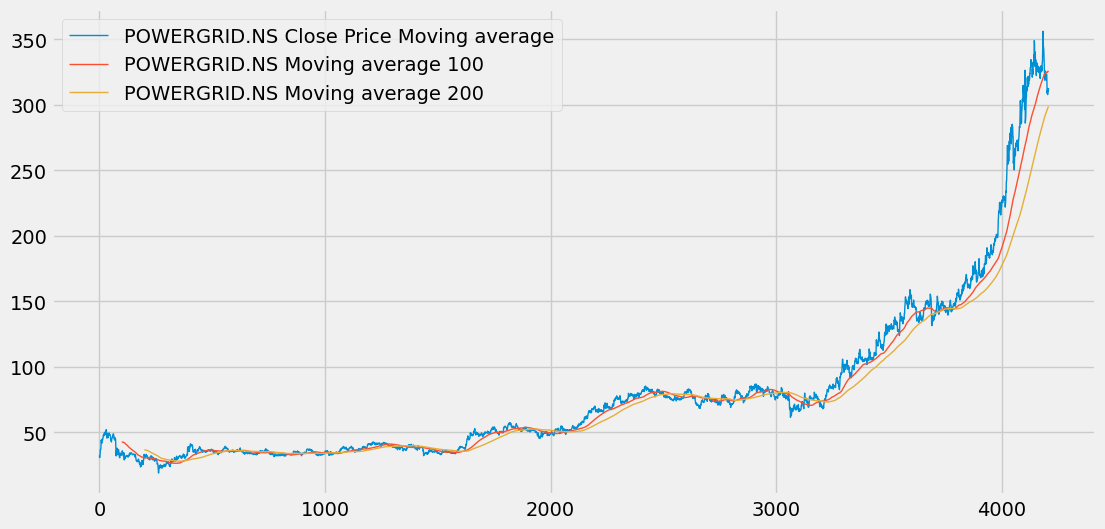

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label = f'{stock} Close Price Moving average',linewidth = 1)
plt.plot(ma100,label = f'{stock} Moving average 100',linewidth = 1)
plt.plot(ma200,label = f'{stock} Moving average 200',linewidth = 1)
plt.legend()
plt.show()

In [27]:
ema100 = df.Close.ewm(span = 100 , adjust = False).mean()

In [28]:
ema200 = df['Close'].ewm(span = 200 , adjust = False).mean()

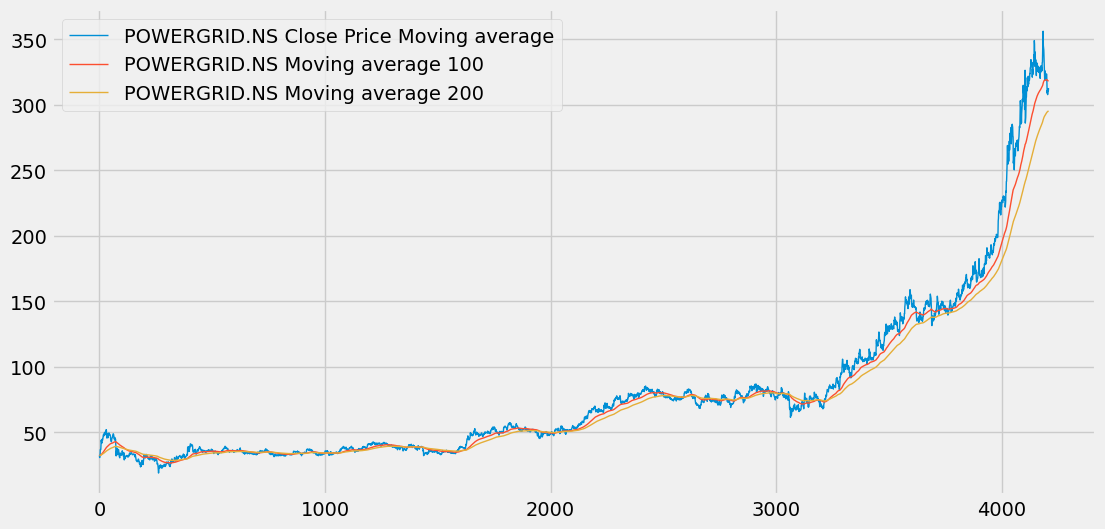

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label = f'{stock} Close Price Moving average',linewidth = 1)
plt.plot(ema100,label = f'{stock} Moving average 100',linewidth = 1)
plt.plot(ema200,label = f'{stock} Moving average 200',linewidth = 1)
plt.legend()
plt.show()

In [30]:
#training and testting

data_training = pd.DataFrame(df['Close'])[0:int(len(df)*0.70)]
data_testing = pd.DataFrame(df['Close'])[int(len(df)*0.70) : int(len(df))]

In [31]:
data_training.shape

(2945, 1)

In [32]:
data_testing.shape

(1263, 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [34]:
data_training_array = scaler.fit_transform(data_training)

In [35]:
data_training_array

array([[0.19808625],
       [0.17371833],
       [0.20447369],
       ...,
       [0.90774464],
       [0.86000405],
       [0.87299647]])

In [71]:
data_training_array.shape[0]

2945

In [72]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
x_train.shape

(2845, 100, 1)

In [38]:
#model Building



In [39]:
#from tensorflow.python.keras.layers import Dense, LSTM, Dropout
#from tensorflow.python.keras.models import Sequential

from tensorflow import keras 
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential



LSTM  Input -> 3D Array (batch_size,time_steps ,seq_len)
LSTM 2D OR 3D
2D -> (batch_size units)
3D -> (batch_size, time_steps, units)

In [96]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()

c:\Users\Ravish Bhatnagar\Desktop\New folder\machineLearningProj\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 0.0990
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - loss: 0.0095
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - loss: 0.0074
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - loss: 0.0074
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - loss: 0.0062
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - loss: 0.0058
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - loss: 0.0057
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - loss: 0.0056
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - loss: 0.0046
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - loss: 0.0054
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - loss: 0.0044
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - loss: 0.0046
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 0.0044
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0045
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/

In [99]:
past_100_days = data_training.tail(100)

In [100]:
#past_100_days.append(data_testing,ignore_index = True)
#final_df = past_100_days.append(data_testing,ignore_index = True)
final_df = final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [102]:
final_df.head()

Ticker,POWERGRID.NS
0,75.731827
1,77.275734
2,77.539810
3,77.377312
4,77.824226


In [103]:
input_data = scaler.fit_transform(final_df)

In [104]:
x_test = []
y_test= []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [105]:
x_test.shape


(1263, 100, 1)

In [106]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


In [107]:
y_predicted.shape

(1263, 1)

In [108]:
scaler.scale_

array([0.00339369])

In [109]:
scaler_factor = 1/0.00339369
y_predicted = y_predicted * scaler_factor
print(y_predicted.shape)
y_test = y_test * scaler_factor

(1263, 1)


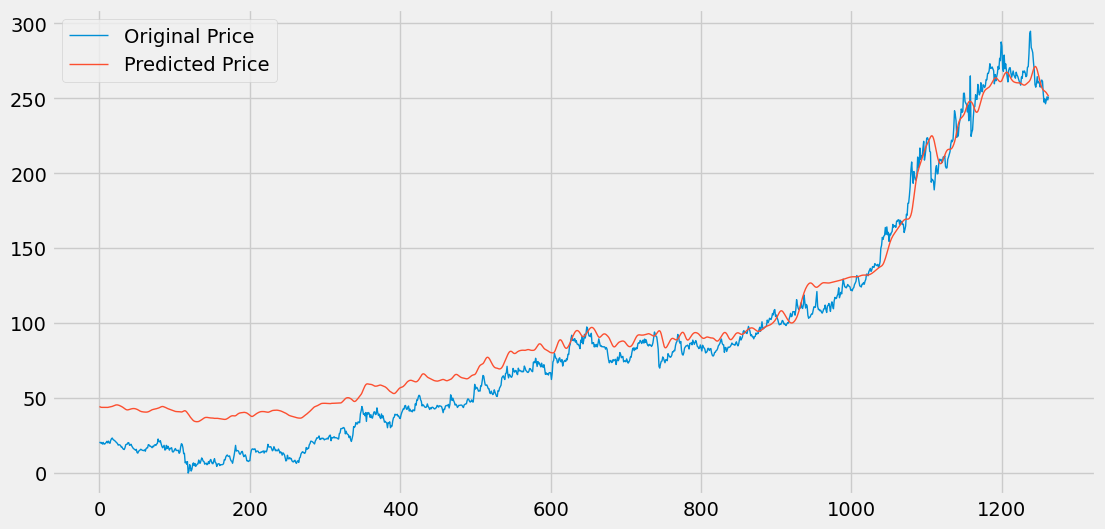

In [112]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Original Price",linewidth = 1)
plt.plot(y_predicted, label="Predicted Price",linewidth = 1)  
plt.legend()
plt.show()

In [111]:
model.save('stock_dl_model.h5')